In [1]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat

wget: /home/apps/anaconda3_2018/4.6.9/lib/libuuid.so.1: no version information available (required by wget)
--2021-01-18 23:16:32--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Connecting to 10.10.78.22:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

100%[=====================================>] 18,20,40,794 8.85MB/s   in 25s    

2021-01-18 23:16:58 (7.01 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]



In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

A = loadmat('./train_32x32.mat')
X = A['X']; y = A['y'];
print(f'X.shape = {X.shape}, y.shape = {y.shape}')
X_ = np.zeros((X.shape[-1], 32, 32, 3))
for i in range(X.shape[-1]):
    X_[i,:,:,:] = X[:,:,:,i]
X = X_

X.shape = (32, 32, 3, 73257), y.shape = (73257, 1)


No handles with labels found to put in legend.


<Figure size 1440x720 with 0 Axes>

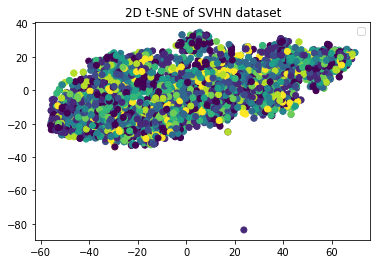

<Figure size 1440x720 with 0 Axes>

In [13]:
pca = PCA(n_components=500)
tsne = TSNE(n_components=2)

points = np.random.choice(X.shape[0], 3000)

X_red = tsne.fit_transform( X.reshape(X.shape[0], -1)[points]   )

y_points = y.reshape(-1)[points]

plt.scatter(X_red[:, 0], X_red[:, 1], c=(y_points/10))
plt.legend()
plt.title('2D t-SNE of SVHN dataset')

plt.figure(figsize=(20,10))

No handles with labels found to put in legend.


Text(0.5, 1.0, '2D t-SNE of SVHN dataset')

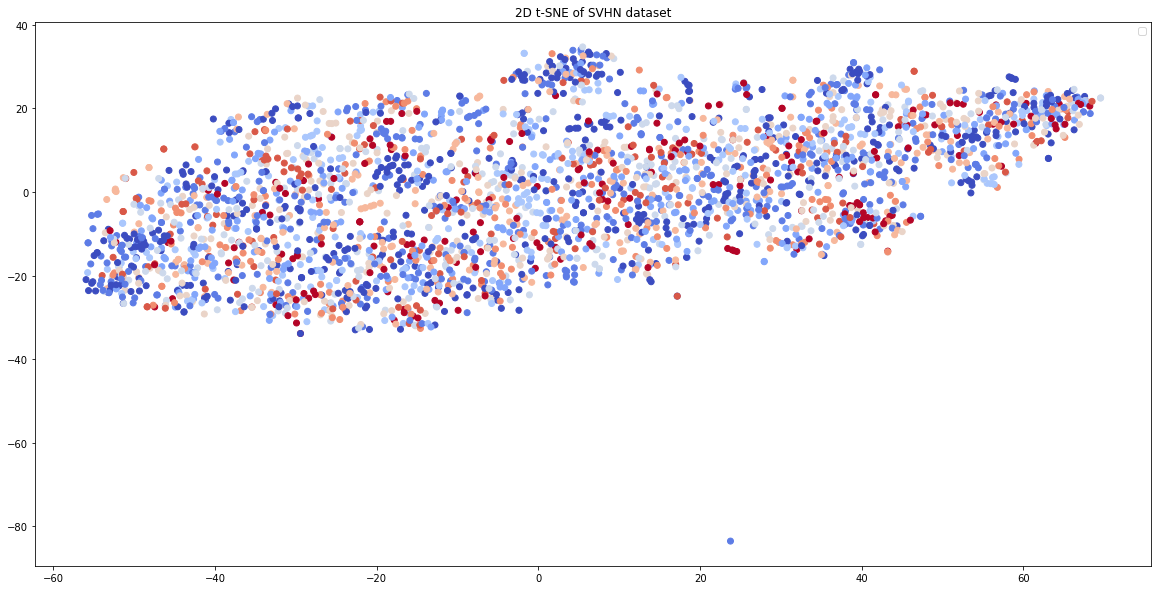

In [14]:
plt.figure(figsize=(20,10))
plt.scatter(X_red[:, 0], X_red[:, 1], c=(y_points/10), cmap=plt.cm.coolwarm)
plt.legend()
plt.title('2D t-SNE of SVHN dataset')



No handles with labels found to put in legend.


Text(0.5, 1.0, '2D-PCA of SVHN dataset')

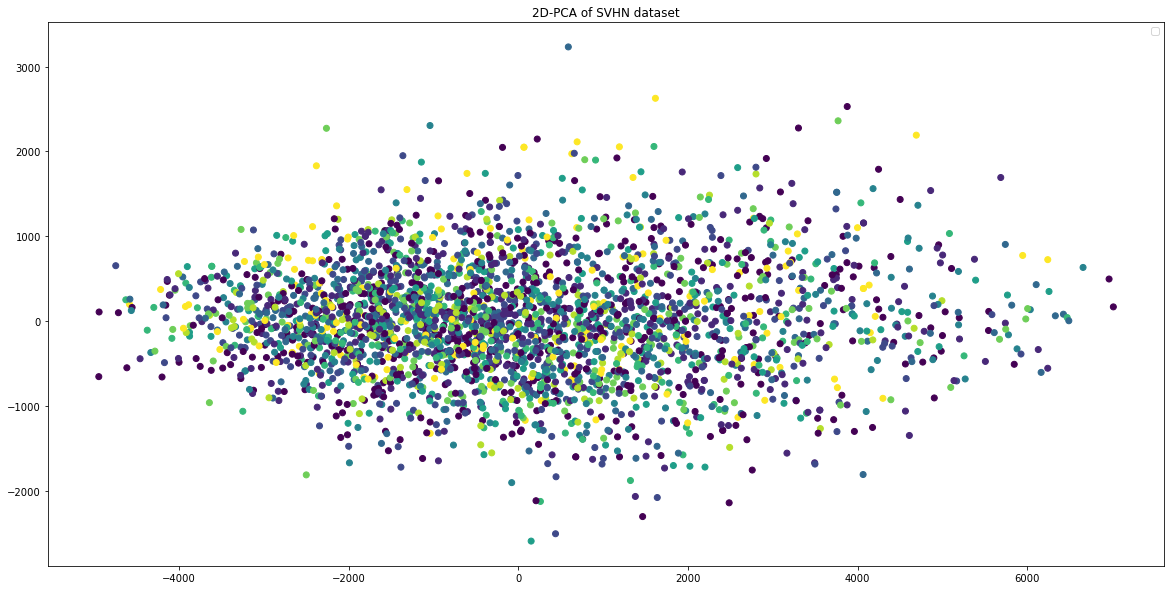

In [10]:
pca2 = PCA(n_components=2)

X_red = pca.fit_transform(X.reshape(X.shape[0], -1)[points])
y_points = y.reshape(-1)[points]
plt.figure(figsize=(20, 10))
plt.scatter(X_red[:, 0], X_red[:, 1], c=(y_points/10))

plt.legend()
plt.title('2D-PCA of SVHN dataset')

In [2]:
X.shape

(73257, 32, 32, 3)

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(X.reshape(X.shape[0], -1))

KMeans(n_clusters=3)

In [5]:
y = kmeans.labels_

In [8]:
from tqdm import tqdm
import os
os.makedirs('svhn_cluster/', exist_ok=True)
Y_all = {}
for k in tqdm([3, 5, 10, 15, 20]):
    kmeans = KMeans(n_clusters=k)
    Y_all[k] = kmeans.fit_predict(X.reshape(X.shape[0], -1))
    np.savez(f'cluster_{k}.npz', X=X, Y = Y_all[k])
    

100%|██████████| 5/5 [40:42<00:00, 488.55s/it]


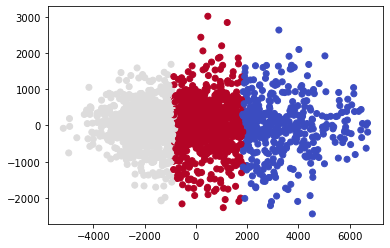

In [16]:
#Visualizing clusters
from sklearn.decomposition import PCA
p = PCA(n_components=2)
K=3
n_points = 2000
points = np.random.choice(X.shape[0], n_points)

y_ = Y_all[K][points]
X_ = p.fit_transform(X[points].reshape(n_points, -1))

plt.scatter(X_[:,0], X_[:, 1], c = y_/K, cmap = plt.cm.coolwarm)